# **BANK SINARMAS DS GRADUATE PROGRAM TEST**

The bank has collected historical data of their, recently, launched digital loan customers. The data collected is scarce, and we need to utilize the most out of it. Machine learning based credit scoring is required to categorize the "good" customers from the "bad".

You are tasked with building a categorization model using machine learning to assess the creditworthiness of a loan customer.
The customer data is in "InputData.csv" 
The column you are trying to predict is called "target" with binary value 0 for good customer and 1 for bad customer.

# **Data Ingestion**

This session consists of several steps to handle the data, including:
1. Data Extraction
2. Data Preprocessing
3. Data Cleaning
4. Data Analysis

Each step has a general description of the process carried out. whilst detailed explanations are explained in several commands in each jupyter code window.

Python programming language is used in this solution because of its compatibility with common machine learning libraries.



**1. Data Extraction**

First, data is being extracted from InputData.csv given.

In [23]:
import pandas as pd

df = pd.read_csv('/content/InputData.csv')
df.head(10)

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,feature_1025,feature_1026,feature_1027,feature_1028,feature_1029,feature_1030,feature_1031,feature_1032,feature_1033,feature_1034,feature_1035,feature_1036,feature_1037,feature_1038,feature_1039,feature_1040,feature_1041,feature_1042,feature_1043,feature_1044,feature_1045,target
0,1783,3000000.0,-999.0,6000000.0,825000.0,45,1,1,329.0,0.832469,1.0,329.0,6.0,8.0,0.832469,0.0,0.833081,0.001993,0.001993,0.000537,0.000537,3.0,18.0,279.0,9.0,5.0,7.0,8.0,41.0,288.0,0.833091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833018,0.000000,287.0,...,0.0,5.968620,2.0,0.0,0.0,0.0,0.0,0.637500,8.0,8.0,1.0,0.0,0.0,0.0,0.0,0.250000,9.0,33.0,0.0,0.0,35.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.0,1.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0
1,8097,1750000.0,-999.0,3652250.0,262000.0,49,1,1,255.0,0.480717,1.0,255.0,0.0,4.0,0.480717,0.0,0.481195,0.001169,0.001169,0.000716,0.000716,14.0,6.0,5.0,9.0,3.0,8.0,210.0,241.0,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.481188,0.000000,0.480743,0.000000,1.0,...,NaN,8.714679,0.0,0.0,0.0,0.0,0.0,0.550893,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,419,2500000.0,-999.0,4000000.0,-999.0,37,1,1,191.0,135.333204,68.0,191.0,0.0,2.0,135.333204,0.0,0.671556,0.668251,0.668251,0.040299,0.040299,2.0,177.0,1.0,1.0,5.0,0.0,5.0,189.0,2.0,0.641889,92.567554,0.044878,0.000000,1.947183,0.000000,40.131701,135.288326,0.044878,0.0,...,1.0,3.047303,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.018182,1.0,54.0,54.0,54.0,54.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4930,1000000.0,-999.0,3600000.0,-999.0,28,1,1,237.0,0.151103,1.0,237.0,1.0,2.0,0.151103,0.0,0.151103,0.000431,0.000431,0.000207,0.000207,6.0,203.0,11.0,5.0,3.0,3.0,6.0,221.0,16.0,0.000000,0.000000,0.000000,0.151103,0.000000,0.000000,0.000000,0.000000,0.151103,3.0,...,NaN,3.078995,0.0,0.0,0.0,0.0,0.0,0.277778,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3516,700000.0,1200000.0,3600000.0,400000.0,30,1,1,205.0,4283.164884,71.0,205.0,0.0,3.0,4283.164884,0.0,1.980293,19.729528,19.729528,1.163959,1.163959,59.0,35.0,85.0,4.0,9.0,6.0,7.0,116.0,89.0,3122.050986,7.407993,208.804587,826.184917,62.800857,54.956841,0.958701,3248.175379,1034.989505,39.0,...,NaN,11.701371,0.0,0.0,0.0,0.0,0.0,0.638889,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,3.0,8.0,2.0,6.0,5.0,0.0,0.342466,25.0,26.0,0.0,2.0,72.0,0.0,1.0,3.0,0.0,0.0,0.0
5,2117,500000.0,-999.0,12000000.0,4500000.0,29,0,1,395.0,0.227344,1.0,395.0,4.0,9.0,0.227344,0.0,0.228080,0.000380,0.000380,0.000195,0.000195,24.0,24.0,9.0,11.0,2.0,11.0,314.0,375.0,20.0,0.000000,0.000000,0.000000,0.228076,0.000000,0.000000,0.000000,0.000000,0.228059,9.0,...,0.0,724.725098,1.0,0.0,0.0,0.0,0.0,0.416667,26.0,8.0,17.0,4.0,8.0,10.0,4.0,0.579545,51.0,14.0,0.0,0.0,87.0,32.0,17.0,26.0,4.0,10.0,6.0,3.0,0.931507,68.0,6.0,0.0,0.0,72.0,0.0,1.0,6.0,0.0,0.0,0.0
6,3213,2500000.0,-999.0,6500000.0,-999.0,23,1,1,376.0,0.000000,0.0,376.0,6.0,5.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,6.0,1.0,0.0,276.0,8.0,81.0,375.0,1.0,0.000000,0.000000,0.

Before processing the data, a simple analysis of the data is required, such as checking for completeness of the data and missing data

In [24]:
# Descriptive statistics checking
df.describe()

# as seen on the screen that the row is only about 364 customers and 
# there is nan value that might be sensed from incompleteness of count description's row

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,feature_1025,feature_1026,feature_1027,feature_1028,feature_1029,feature_1030,feature_1031,feature_1032,feature_1033,feature_1034,feature_1035,feature_1036,feature_1037,feature_1038,feature_1039,feature_1040,feature_1041,feature_1042,feature_1043,feature_1044,feature_1045,target
count,364.000000,3.640000e+02,3.640000e+02,3.640000e+02,3.640000e+02,364.000000,364.000000,364.0,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,183.000000,360.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,363.000000,363.000000,362.00000,362.000000,362.000000,363.000000
mean,4709.637363,1.698324e+06,1.892254e+05,5.257457e+06,2.842101e+05,29.239011,0.609890,1.0,250.906336,204.468421,25.063361,252.980716,2.168044,4.837466,203.324472,2.016997,3.866692,0.866040,0.866040,0.104352,0.104352,33.090909,25.490358,25.005510,12.528926,32.743802,24.451791,97.595041,213.371901,37.534435,39.863587,15.423746,33.747716,26.006833,34.041577,33.958049,21.427118,144.713949,59.754546,16.137741,...,0.508197,726.378175,0.154270,0.641873,0.013774,0.201102,0.603306,0.420080,10.738162,3.058496,7.036212,2.431755,5.732591,1.922006,1.880223,0.157588,24.100279,17.298050,1.465181,7.311978,45.657382,9.303621,3.364903,6.086351,1.793872,4.256267,1.568245,1.537604,0.281738,19.955432,18.309192,2.150418,4.827298,49.551532,0.429752,1.790634,2.40884,0.477901,0.466851,0.082645
std,2615.147895,1.063202e+06,3.538088e+05,2.681590e+06,6.002134e+05,6.393481,0.488446,0.0,55.160860,611.881125,38.508288,55.689571,2.048277,3.288777,611.681773,10.427350,11.700714,2.738844,2.738844,0.304036,0.304036,65.319106,60.247205,60.697238,38.217408,68.147208,59.799063,104.439460,83.133501,70.276925,241.891941,102.319837,153.904976,126.858168,214.515611,158.219963,87.127153,515.258198,221.982024,42.218228,...,1.047597,2361.358266,0.513252,3.846302,0.262432,0.595377,3.016930,0.176057,21.417986,7.590381,15.556576,6.640842,13.246516,5.706954,5.856250,0.957110,42.026474,19.192578,9.358967,16.002711,37.613844,14.592405,5.614028,12.408359,3.987672,9.083170,3.494640,3.861876,0.754133,32.670237,17.400690,10.118830,12.176689,35.009368,0.495724,1.127369,2.05566,1.394810,1.400536,0.275724
min,22.000000,0.000000e+00,-9.990000e+02,3.000000e+06,-9.990000e+02,21.000000,0.000000,1.0,59.000000,0.000000,0.000000,59.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-718.028009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-

In [25]:
# checking for data types
df.info()
# there are two kind of data types, float and int
# the int one might be categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Columns: 1047 entries, Unnamed: 0 to target
dtypes: float64(1036), int64(11)
memory usage: 2.9 MB


**2. Data Preprocessing**

Checking the null data.

In [51]:
isnull_column=[]
notnull_column=[]
for value in df.isnull().sum():
    if value==False:
        notnull_column.append(column)
    else:
        isnull_column.append(column)
    
print('count of notnull column = ' + str(len(notnull_column)))
print('count of isnull column = ' + str(len(isnull_column)))


count of notnull column = 18
count of isnull column = 1029


In [69]:
sorted(df.isnull().sum(), reverse=True)[50:60]

# there is a very striking difference in the number of null data in each column. 
# so we can group the column with null data based on this.

[130, 130, 130, 130, 130, 14, 14, 14, 14, 14]

In [70]:
minor_null_column=[]
major_null_column=[]
for index, value in enumerate(df.isnull().sum()):
    if value < 100:
        minor_null_column.append('feature_'+str(index))
    else:
        major_null_column.append('feature_'+str(index))

print('minor_null_column = '+str(len(minor_null_column)))
print('major_null_column = '+str(len(major_null_column)))

minor_null_column = 992
major_null_column = 55


Checking the balance on the data category

In [64]:
print(pd.value_counts(df['target']))
print('good = ', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('bad  = ', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0.0    333
1.0     30
Name: target, dtype: int64
good =  91.48 % of the dataset
bad  =  8.24 % of the dataset


Note: There is an imbalance of class categories in the target column. in the calculation of machine learning models this can lead to bias in the classification results, so it needs to be addressed.

**3. Data Cleaning**

A. Handling Null Datas

* data type in the form of float will be filled with the average value of data, 
* data type in the form of integer will be filled with data mode

In [84]:
for col in df.columns:
    if df[col].dtype=='float64':
        df[col].fillna(df[col].mean(), inplace = True)
    elif df[col].dtype=='int64':
        df[col].fillna(df[col].mode(), inplace = True)

In [114]:
# rounding the class category

for index, i  in enumerate(df['target']):
    if i !=1.0 and i !=0.0:
        df.iloc[index, df.columns.get_loc('target')] = float(round(i))

B. Handling Imbalance Datas

There are several solutions to overcome the data imbalance.

* Up-sampling : technique of duplicating minor data so that the amount is the same as major data, 
* Down-sampling : technique of duplicating major data so that the amount is the same as minor data, 
* SMOTE : technique of extrapolating minor data so that the amount is the same as major data. 

Because the data used is quite limited and the data difference is quite significant, the SMOTE technique is used. This is done so that the data generation is done very carefully.

(will be done in modelling section)

In [89]:
# it is necessary to normalize the data first, because there are 2 types of data in our dataset. 

from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.

scaler = RobustScaler()
for col in df.columns:
    if df[col].dtype=='float64':
        continue
    elif df[col].dtype=='int64':
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))


good 91.48 % of the dataset
bad 8.24 % of the dataset


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Columns: 1047 entries, Unnamed: 0 to target
dtypes: float64(1047)
memory usage: 2.9 MB


In [111]:
df.tail(5)

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,feature_1025,feature_1026,feature_1027,feature_1028,feature_1029,feature_1030,feature_1031,feature_1032,feature_1033,feature_1034,feature_1035,feature_1036,feature_1037,feature_1038,feature_1039,feature_1040,feature_1041,feature_1042,feature_1043,feature_1044,feature_1045,target
359,0.648710,2500000.0,750000.0,6500000.0,800000.0,1.055556,-1.0,0.0,235.0,0.590837,1.0,235.0,10.0,6.0,0.590837,0.000000,0.591274,0.002280,0.002280,0.000234,0.000234,2.0,7.0,5.0,5.0,9.0,2.0,205.0,225.0,10.0,0.000000,0.000000,0.000000,0.591276,0.000000,0.000000,0.000000,0.000000,0.591267,3.0,...,0.000000,-716.744041,0.00000,0.000000,0.000000,0.000000,0.000000,0.623077,27.000000,13.000000,10.000000,3.000000,5.000000,9.000000,2.000000,0.583333,42.000000,9.00000,0.000000,0.000000,71.000000,15.000000,5.000000,1.000000,3.000000,0.000000,7.000000,0.000000,0.390244,16.000000,19.000000,0.000000,2.000000,40.000000,0.000000,1.000000,4.00000,0.000000,0.000000,0.000000
360,0.765509,1500000.0,530000.0,5000000.0,750000.0,0.722222,0.0,0.0,190.0,247.794538,75.0,190.0,3.0,3.0,247.794538,1.351617,21.966174,1.119287,1.119287,0.184895,0.184895,133.0,9.0,1.0,1.0,16.0,29.0,1.0,188.0,2.0,57.503731,41.040338,0.000000,0.000000,85.793133,63.457337,0.000000,247.794538,0.000000,6.0,...,0.508197,10070.609470,0.00000,0.000000,0.000000,0.000000,0.000000,0.556000,1.000000,0.000000,11.000000,0.000000,10.000000,0.000000,1.000000,0.244444,22.000000,24.00000,0.000000,24.000000,89.000000,9.000000,4.000000,7.000000,4.000000,5.000000,1.000000,0.000000,0.238636,21.000000,20.000000,0.000000,3.000000,87.000000,1.000000,2.000000,2.00000,0.000000,0.000000,0.000000
361,-0.948573,750000.0,600000.0,3089000.0,-999.0,-0.500000,0.0,0.0,251.0,0.278501,1.0,251.0,5.0,5.0,0.278501,0.000000,0.278970,0.000763,0.000763,0.000347,0.000347,11.0,12.0,24.0,15.0,14.0,9.0,166.0,212.0,39.0,0.000000,0.000000,0.278934,0.000000,0.000000,0.000000,0.000000,0.000000,0.278905,4.0,...,2.000000,6.360520,0.00000,0.000000,0.000000,0.000000,0.000000,0.437035,6.000000,4.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.216667,13.000000,11.00000,0.000000,2.000000,59.000000,22.000000,1.000000,49.000000,3.000000,41.000000,5.000000,10.000000,1.272727,112.000000,8.000000,0.000000,2.000000,87.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000
362,0.103331,2000000.0,-999.0,6000000.0,2000000.0,1.277778,-1.0,0.0,203.0,144.428365,79.0,203.0,0.0,3.0,144.428365,0.000000,3.370830,0.607990,0.607990,0.103480,0.103480,4.0,1.0,47.0,0.0,3.0,3.0,145.0,156.0,47.0,7.242001,0.000000,16.926454,0.000000,42.269099,2.576717,75.414094,127.501911,16.926454,48.0,...,0.508197,6.251128,0.00000,0.000000,0.000000,0.000000,1.000000,0.666667,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.071429,5.000000,39.00000,2.000000,2.000000,69.000000,3.000000,0.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.066667,6.000000,40.000000,0.000000,16.000000,89.000000,1.000000,2.000000,1.00000,0.000000,0.000000,0.000000
363,0.969072,1000000.0,-999.0,3700000.0,450000.0,-0.611111,-1.0,0.0,332.0,3.474358,1.0,332.0,3.0,7.0,3.474358,0.000000,3.474977,0.006821,0.006821,0.003643,0.003643,195.0,26.0,7.0,12.0,5.0,79.0,8.0,313.0,19.0,0.000000,0.000000,0.000000,0.000000,3.474981,0.000000,0.000000,3.474394,0.000000,64.0,...,0.508197,726.378175,0.15427,0.641873,0.013774,0.201102,0.603306,0.420080,10.

**4. Data Analysis**

This session shows the distribution of the data

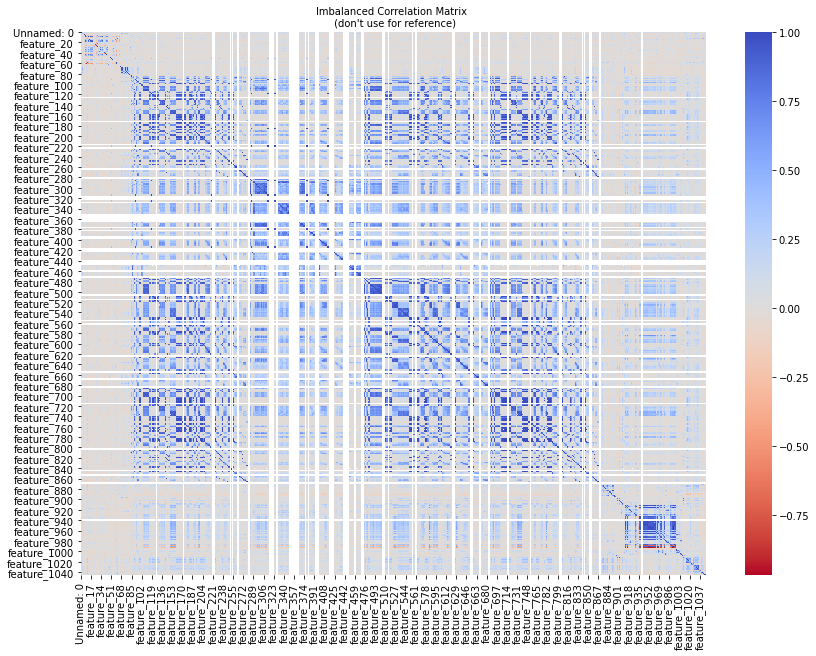

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1) = plt.subplots(1, 1, figsize=(14,10))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Good || 1: Bad)')

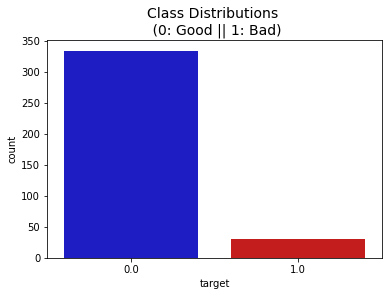

In [115]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=df, palette=colors)
plt.title('Class Distributions \n (0: Good || 1: Bad)', fontsize=14)

# **Data Modelling and evaluation**

There are several solutions to overcome the data imbalance.

* Up-sampling : technique of duplicating minor data so that the amount is the same as major data,
* Down-sampling : technique of duplicating major data so that the amount is the same as minor data,
* SMOTE : technique of extrapolating minor data so that the amount is the same as major data.

Because the data used is quite limited and the data difference is quite significant, the SMOTE technique is used. This is done so that the data generation is done very carefully.

The model chosen is Logistic Regression because its simplicity for the limited data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lr.fit(X_train, y_train.ravel())
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       103
         1.0       0.00      0.00      0.00         7

    accuracy                           0.92       110
   macro avg       0.47      0.49      0.48       110
weighted avg       0.88      0.92      0.90       110



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [126]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Smote
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

# train the model on train set
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

Before OverSampling, counts of label '1': 23
Before OverSampling, counts of label '0': 231 

After OverSampling, the shape of train_X: (462, 1046)
After OverSampling, the shape of train_y: (462,) 

After OverSampling, counts of label '1': 231
After OverSampling, counts of label '0': 231
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82       103
         1.0       0.12      0.57      0.20         7

    accuracy                           0.70       110
   macro avg       0.54      0.64      0.51       110
weighted avg       0.91      0.70      0.78       110



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
